In [43]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras import optimizers, losses, activations, models
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [44]:
train_path= 'C:/Users/ASUS/Desktop/res_spectral_centroid/train'
test_path= 'C:/Users/ASUS/Desktop/res_spectral_centroid/test'
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [45]:
print(class_names)
print(class_names_test)

['abnormal', 'normal']
['abnormal', 'normal']


In [46]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [47]:
train_generator = train_datagen.flow_from_directory('C:/Users/ASUS/Desktop/res_spectral_centroid/train',target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory('C:/Users/ASUS/Desktop/res_spectral_centroid/test',target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 495 images belonging to 2 classes.
Found 211 images belonging to 2 classes.


In [48]:
ROWS=224
COLS=224

In [49]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications

input_shape = (ROWS, COLS, 3)
nclass = 1

base_model = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(ROWS, COLS,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(nclass, 
                    activation='softmax'))

model = add_model

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [50]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# weight_path="{}_weights.best.hdf5".format('spectro_sound_model')
checkpoint = ModelCheckpoint(filepath ="./check.hDf5", monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)
# reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', 
#                                    factor=0.8, patience=5, 
#                                    verbose=1, mode='auto', 
#                                    epsilon=0.0001, cooldown=5, 
#                                    min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early]

In [51]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
opt = tf.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, 
    loss=losses.binary_crossentropy, 
    metrics=['accuracy', 'Precision', 'AUC', tf.keras.metrics.Recall(), tf.keras.metrics.TrueNegatives()])

In [52]:
training_images = 456
validation_images = 144 

history = model.fit_generator(train_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 50,  # change this for better results
                   validation_data = test_generator)  # this should be equal to total number of images in validation set.

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18996/615836474.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results.


Epoch 1/50
16/16 [==============================] - 72s 4s/step - loss: 15.5398 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00 - val_loss: 2.0392 - val_accuracy: 0.5355 - val_precision: 0.5355 - val_auc: 0.5000 - val_recall_4: 1.0000 - val_true_negatives_4: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 56s 4s/step - loss: 15.0954 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00 - val_loss: 2.3704 - val_accuracy: 0.5355 - val_precision: 0.5355 - val_auc: 0.5000 - val_recall_4: 1.0000 - val_true_negatives_4: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 54s 3s/step - loss: 10.1746 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00 - val_loss: 3.2030 - val_accuracy: 0.5355 - val_precision: 0.5355 - val_auc: 0.5000 - val_recall_4: 1.0000 - val_true_negatives_4: 0.0000e+00
Epoch 4/50
16/16 [=======

16/16 [==============================] - 54s 3s/step - loss: 2.5544 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00 - val_loss: 1.0337 - val_accuracy: 0.5355 - val_precision: 0.5355 - val_auc: 0.5000 - val_recall_4: 1.0000 - val_true_negatives_4: 0.0000e+00
Epoch 27/50
16/16 [==============================] - 53s 3s/step - loss: 3.4970 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00 - val_loss: 2.4238 - val_accuracy: 0.5355 - val_precision: 0.5355 - val_auc: 0.5000 - val_recall_4: 1.0000 - val_true_negatives_4: 0.0000e+00
Epoch 28/50
16/16 [==============================] - 49s 3s/step - loss: 2.5032 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00 - val_loss: 2.2256 - val_accuracy: 0.5355 - val_precision: 0.5355 - val_auc: 0.5000 - val_recall_4: 1.0000 - val_true_negatives_4: 0.0000e+00
Epoch 29/50
16/16 [==================

In [53]:
import statistics
print (statistics.mean(history.history['accuracy']))
print (statistics.mean(history.history['val_accuracy']))

0.5252525210380554
0.5355450510978699


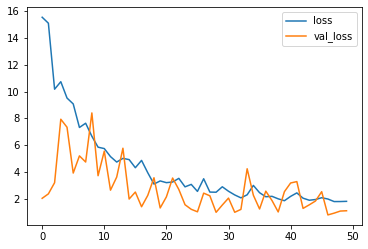

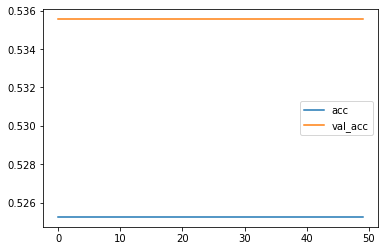

In [54]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [55]:
model.evaluate(test_generator)

7/7 [==============================] - 10s 1s/step - loss: 1.1113 - accuracy: 0.5355 - precision: 0.5355 - auc: 0.5000 - recall_4: 1.0000 - true_negatives_4: 0.0000e+00    


[1.1112726926803589, 0.5355450510978699, 0.5355450510978699, 0.5, 1.0, 0.0]